In [32]:
from pystac_client import Client
from shapely.geometry import Point, Polygon, LineString
import rioxarray
import pystac
from pyproj import CRS

# Get Data

### Using Earth Search STAC API

In [3]:
api_url = "https://earth-search.aws.element84.com/v1"

client = Client.open(api_url)

In [4]:
collection = "sentinel-2-l2a"  # Sentinel-2, Level 2A, Cloud Optimized GeoTiffs (COGs)

### Asking for scenes intersecting a geometry defined using the shapely library:

In [5]:
point = Point(-122.54139915601945, 38.020000922925874)

### Find scenes that match requirements

In [6]:
search = client.search(
    collections=[collection],
    intersects=point,
    max_items=10,
    datetime="2023-04-01/2023-04-30",
    query=["eo:cloud_cover<15"]
)
print(search.matched())

4


### Get Metadata

In [7]:
items = search.item_collection()
print(len(items))

4


In [8]:
# Save this search configuration to a file for later
# items.save_object("search.json")

In [9]:
for item in items:
    print(item)

<Item id=S2B_10SEH_20230424_0_L2A>
<Item id=S2B_10SEH_20230414_0_L2A>
<Item id=S2A_10SEH_20230409_0_L2A>
<Item id=S2B_10SEH_20230404_0_L2A>


### Check metadata of item

In [10]:
item = items[0]
print(item.datetime)
print(item.geometry)
print(item.properties)

2023-04-24 19:03:56.879000+00:00
{'type': 'Polygon', 'coordinates': [[[-123.00021895577572, 38.84898947181679], [-121.73505156481204, 38.842139787815405], [-121.75214580386294, 37.852838634285284], [-123.00021599591253, 37.85945097203489], [-123.00021895577572, 38.84898947181679]]]}
{'created': '2023-04-25T02:05:57.243Z', 'platform': 'sentinel-2b', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'eo:cloud_cover': 2.984466, 'proj:epsg': 32610, 'mgrs:utm_zone': 10, 'mgrs:latitude_band': 'S', 'mgrs:grid_square': 'EH', 'grid:code': 'MGRS-10SEH', 'view:sun_azimuth': 146.61243754203, 'view:sun_elevation': 60.945082512473505, 's2:degraded_msi_data_percentage': 0.0215, 's2:nodata_pixel_percentage': 0, 's2:saturated_defective_pixel_percentage': 0, 's2:dark_features_percentage': 0.084519, 's2:cloud_shadow_percentage': 0.001022, 's2:vegetation_percentage': 66.476291, 's2:not_vegetated_percentage': 19.006102, 's2:water_percentage': 10.108022, 's2:unclassified_percentage': 1.316047, 's2:medi

### Get Assets

In [11]:
assets = items[0].assets  # first item's asset dictionary
print(assets.keys())

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])


Lets get a description of each asset

In [12]:
for key, asset in assets.items():
    print(f"{key}: {asset.title}")

aot: Aerosol optical thickness (AOT)
blue: Blue (band 2) - 10m
coastal: Coastal aerosol (band 1) - 60m
granule_metadata: None
green: Green (band 3) - 10m
nir: NIR 1 (band 8) - 10m
nir08: NIR 2 (band 8A) - 20m
nir09: NIR 3 (band 9) - 60m
red: Red (band 4) - 10m
rededge1: Red edge 1 (band 5) - 20m
rededge2: Red edge 2 (band 6) - 20m
rededge3: Red edge 3 (band 7) - 20m
scl: Scene classification map (SCL)
swir16: SWIR 1 (band 11) - 20m
swir22: SWIR 2 (band 12) - 20m
thumbnail: Thumbnail image
tileinfo_metadata: None
visual: True color image
wvp: Water vapour (WVP)
aot-jp2: Aerosol optical thickness (AOT)
blue-jp2: Blue (band 2) - 10m
coastal-jp2: Coastal aerosol (band 1) - 60m
green-jp2: Green (band 3) - 10m
nir-jp2: NIR 1 (band 8) - 10m
nir08-jp2: NIR 2 (band 8A) - 20m
nir09-jp2: NIR 3 (band 9) - 60m
red-jp2: Red (band 4) - 10m
rededge1-jp2: Red edge 1 (band 5) - 20m
rededge2-jp2: Red edge 2 (band 6) - 20m
rededge3-jp2: Red edge 3 (band 7) - 20m
scl-jp2: Scene classification map (SCL)
swi

Thumbnail preview

In [13]:
print(assets["thumbnail"].href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/10/S/EH/2023/4/S2B_10SEH_20230424_0_L2A/thumbnail.jpg


### Get Near Infrared asset

In [45]:
nir_href = assets["nir"].href
nir = rioxarray.open_rasterio(nir_href, masked=True)
print(nir)

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05 6.098e+05
  * y            (y) float64 4.3e+06 4.3e+06 4.3e+06 ... 4.19e+06 4.19e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0


### Download to disk (optional)

In [15]:
#nir.rio.to_raster("nir.tif")

# Visualize Data

In [23]:
nir

# nir = rioxarray.open_rasterio(items[0].assets["nir"].href) # Another optional way to load this from just the items in one line

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05 6.098e+05
  * y            (y) float64 4.3e+06 4.3e+06 4.3e+06 ... 4.19e+06 4.19e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [24]:
print("CRS:",nir.rio.crs)
print("No Data Rows:",nir.rio.nodata)
print("Bounds:",nir.rio.bounds())
print("Width:",nir.rio.width)
print("Height:",nir.rio.height)

CRS: EPSG:32610
No Data Rows: 0
Bounds: (499980.0, 4190220.0, 609780.0, 4300020.0)
Width: 10980
Height: 10980


In [25]:
nir.values

array([[[2800, 2618, 2684, ..., 3384, 3396, 3416],
        [2984, 2940, 2812, ..., 3331, 3368, 3407],
        [2856, 2730, 2662, ..., 3264, 3300, 3400],
        ...,
        [ 306,  319,  358, ..., 2990, 3420, 3476],
        [ 342,  338,  304, ..., 2828, 3432, 3412],
        [ 356,  272,  231, ..., 2786, 3072, 3272]]], dtype=uint16)

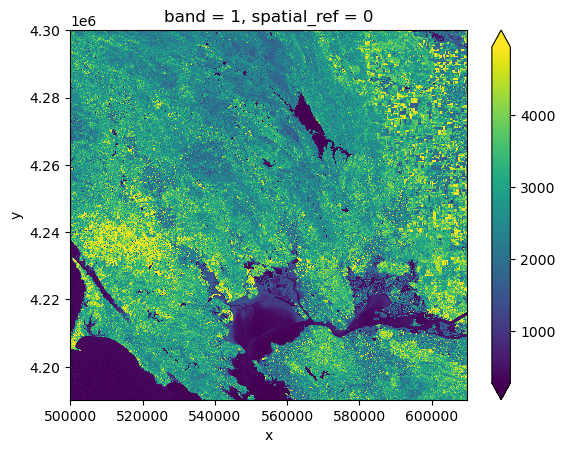

In [46]:
nir.plot(robust=True) # robust displays values between the 2nd and 98th percentile, leaving out major outliers

### CRS Info

In [31]:
print(nir.rio.crs)
print(nir.rio.crs.to_epsg())

EPSG:32610
32610


Get more info on this EPSG CRS code

In [33]:
epsg = nir.rio.crs.to_epsg()
crs = CRS(epsg)
crs

<Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
crs.area_of_use.bounds

(-126.0, 0.0, -120.0, 84.0)

### Raster Statistics

In [44]:
print(nir.min())
print(nir.max())
print(nir.mean())
print(nir.std())

<xarray.DataArray ()>
array(1, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(15848, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2647.67826972)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(1120.96989131)
Coordinates:
    spatial_ref  int64 0


## Multi Band Raster

In [48]:
overview = rioxarray.open_rasterio(items[0].assets['visual'].href, overview_level=3)
overview

<xarray.DataArray (band: 3, y: 687, x: 687)>
[1415907 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 5.001e+05 5.002e+05 ... 6.095e+05 6.097e+05
  * y            (y) float64 4.3e+06 4.3e+06 4.3e+06 ... 4.19e+06 4.19e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [49]:
overview.shape

(3, 687, 687)

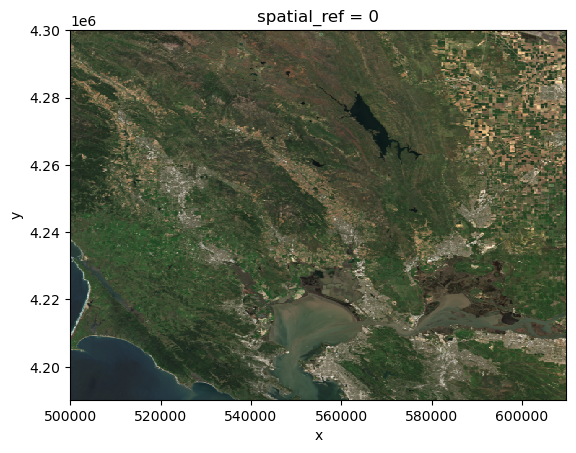

In [50]:
overview.plot.imshow() # function makes assumptions about the shape of the input DataArray, that since it has three channels, the correct colormap for these channels is RGB. It does not work directly on image arrays with more than 3 channels.

The image here is stretched, but we know the width/height ratio is 1:1 (687:687) so lets show it with an aspect of 1. We need size in order to use aspect

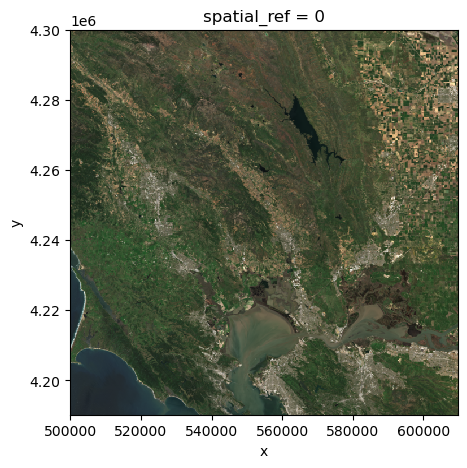

In [54]:
overview.plot.imshow(size=5, aspect=1)